In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from scipy import stats

# Inferencia

La inferencia estadística estudia como sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad de los resultados obtenidos.

## Método de los momentos

La idea de este método se basa en que, dada una muestra (x1,...,xn) de la variable X que sigue una distribución dada por $f(x,\Theta )$, la media muestral $\bar{x}$ “debe parecerse” a la media poblacional $E_\Theta(X)$ 

In [4]:
## tomo una muestra de tamaño 10 de una poblacion que sigue una distribucion normal(10,4)
muestra = stats.norm(10,4).rvs(10)

In [5]:
muestra.mean()

9.39975982185057

In [6]:
muestra.std()

3.787488241706161

Tambien se puede definir la distribución dandole datos de entrenamiento en lugar de la media y la varianza,

In [7]:
s=[ 2.50894018,  1.27903325,  5.03029373,  4.01108373,  4.10059168,
       12.22369783, 10.02783681,  5.24698163,  0.22345874,  8.96049011]

In [8]:
stats.norm.fit(s)

(5.361240769, 3.6953567303761825)

In [9]:
s=np.array([7.34606809, 6.03022743, 6.9555633 , 6.94775404, 8.58099473,
       6.30417826, 6.36653388, 6.76947531, 6.54903626, 6.26305402])
stats.expon.fit(s)

(6.03022743, 0.7810611020000007)

#### Ejercicio
Una población $X$ sigue una exponencial
$Exp(\lambda)$ de parámetro desconocido. Calcular el estimador
de $\theta=\lambda$ por el método de los momentos.

$X$ es continua con función de densidad 
$$f_\lambda(x)=\left\{
\begin{array}{ll} 0 \hspace{1cm} \\ \lambda e^{- \lambda x}
\hspace{0.5cm} \end{array} \right. $$

In [10]:
from sympy import *

In [11]:
init_printing()

In [12]:
l = Symbol("lambda",positive=True,nonzero=True)
x = Symbol("x")
expresion = x*l*exp(-l*x)
expresion

In [13]:
E=integrate(x*1*exp(-1*x))
E

In [14]:
limit(E,x,+oo)-limit(E,x,0)

## Método de Máxima Verosimilitud

Sea X una población con función de masa $P_{\Theta}$, o de densidad $f_{\Theta}$, 

$\Theta$ = ($\theta_{1}$,$\theta_{2}$,···,$\theta_{k}$)  ∈$\varTheta$,y (X1,X2,···,Xn) una muestra aleatoria simple.

El estimador de máxima verosimilitud de θ es el formado por los valores ($\hat{\theta_{1}}$,$\hat{\theta_{2}}$,···,$\hat{\theta_{k}}$) que maximiza lo que llamamos función de verosimilitud de la muestra (x1,x2,···,xn) obtenida 

$$L(\Theta) = L(\Theta;x_{1, x{2},...,x{n}}) = \left\{\begin{matrix}
P_{\Theta}(x_{1}) \cdot P_{\Theta}(x_{2}) \cdot ..... \cdot P_{\Theta}(x_{n}) \rightarrow Discreta\\ 
f_{\Theta}(x_{1}) \cdot f_{\Theta}(x_{2}) \cdot ..... \cdot f_{\Theta}(x_{n}) \rightarrow Continua
\end{matrix}\right.$$



## Ejercicio - Máxima Verosimilitud Discreta

El parámetro de una distribución de Poisson
puede tomar uno de los cuatro valores siguientes: $\lambda = 4;\;
4,5;\; 5,5;\; 6$. Decida cual de ellos puede ser, considerando una
muestra aleatoria simple de tamaño dos $(X_1,X_2)$, con
realización $(x_1,x_2)=(3,7)$, y basándose en el principio de
máxima verosimilitud.

Buscamos el $\lambda$ que maximice la funcion de verosimilitud P(X=3)*P(X=7)

In [15]:
#lambda = 4
mi_poisson = stats.poisson(4)
#P(X=3)*P(X=7)
vero = mi_poisson.pmf(3)*mi_poisson.pmf(7)
vero

In [16]:
def vero(l):
    mi_poisson = stats.poisson(l)
    return mi_poisson.pmf(3)*mi_poisson.pmf(7)

In [17]:
vero(5)

In [18]:
for i in [4,4.5,5.5,6]:
    print(vero(i))

0.011632210995883064
0.013896102657254342
0.013989616432971738
0.012285615923866327


## Ejercicio - Máxima Verosimilitud Discreta

En una gran piscifactoría hay una proporción desconocida de  peces de una especia A.
  Para obtener información sobre esa proporción, vamos a ir sacando peces al azar.

* Si la proporción de peces de la especie A es $p$, ¿cuál es la probabilidad de que el primer pez de la especie A sea el décimo que extraemos? 
* Tres personas realizan, independientemente unas de otras, el proceso de sacar peces al azar hasta encontrarse con el primero del tipo A:

    * La primera persona obtiene el primer pez tipo A en la décima exacción. 
    * La segunda persona obtiene el primer pez tipo A en la decimoquinta extracción. 
    * La tercera persona obtiene el primer pez tipo A en la decimoctava extracción.

Escribir la función de verosimilitud y obtener la estimación de máxima verosimilitud de $p$.

In [19]:
## ## 1
# Binomial de 10 intentos y 1 exito. pexito = p

In [20]:
from sympy import *

In [21]:
p=Symbol("p")

In [22]:
Lc = p**3*(1-p)**40

In [23]:
solve(diff(Lc,p),p)

## Ejercicio - Máxima Verosimilitud  Continua

La duración en minutos de un determinado viaje
es una variable aleatoria con distribución normal de media
desconocida y desviacion tipica desconocida. En una muestra
aleatoria de diez realizaciones del viaje en cuestión se
obtuvieron los siguientes tiempos
$$x_1=10,1 \;\; x_2=6,5 \;\; x_3=5,5 \;\; x_4=7,9 \;\; x_5=8,2
\;\; x_6=6,5$$ $$  x_7=7,0\;\; x_8=8,1 \;\; x_9=6,9 \;\
x_{10}=7,7.$$ Se pide:

* Estimar por máxima verosimilitud la duración media del viaje.  
* Calcular la probabilidad de que, en valor absoluto, la diferencia entre la estimación media estimada y la real sea menor que un minuto.

In [24]:
datos = np.array([10.1,6.5,5.5,7.9,8.2,6.5,10.1,6.5,5.5,7.9,8.2,6.5,7.0,8.1,6.9,7.7])
stats.norm.fit(datos)

In [25]:
datos.mean()

In [26]:
datos.var()**0.5

## Maxima Verosimilitud para un estimador Gausiano

In [27]:
from scipy.optimize import minimize

sample=stats.norm(100,20).rvs(1000)
sample=np.array([10.1,6.5,5.5,7.9,8.2,6.5,10.1,6.5,5.5,7.9,8.2,6.5,7.0,8.1,6.9,7.7])

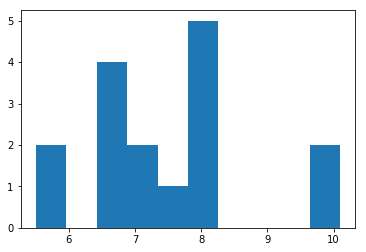

In [28]:
plt.hist(sample)
plt.show()

In [29]:
from sympy import *

In [30]:
init_printing()

In [31]:
u = Symbol("mu")
s = Symbol("sigma")
x = Symbol("x")

In [32]:
Gaussian_Formula = exp( (-1/2)*( (x-u)/s )**2 )/(s*sqrt(2*pi))

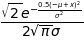

In [33]:
Gaussian_Formula

In [34]:
def log_likelihood_individual(x, mu, sig):
    """"""
    #Do not use Math
    return np.log(np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))-np.log( np.sqrt(2*math.pi)*sig  )

In [35]:
def sum_logs(u, s, sample=sample):
    return sum([log_likelihood_individual(x, u, s) for x in sample])

In [36]:
def maximize(sample):
    negative_ll = lambda params: -sum_logs(*params, sample=sample)
    params0 = np.array([10, 10])
    res = minimize(negative_ll, params0, method='nelder-mead', options={'xtol': 1e-8})
    return res

In [37]:
def fit(sample):
    res = maximize(sample)
    if res.status != 0:
        raise Exception(res.message)
    return res.x

In [38]:
res = fit(sample)

In [39]:
res[0]

In [40]:
res[1]